In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv("/kaggle/input/plant-pathology-2020-fgvc7/train.csv")
train_df.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [4]:
test_df = pd.read_csv("/kaggle/input/plant-pathology-2020-fgvc7/test.csv")
test_df.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


In [5]:
healthy_label = train_df['healthy'].value_counts()[1]
healthy_label

516

In [6]:
multiple_diseases = train_df['multiple_diseases'].value_counts()[1]
multiple_diseases

91

In [7]:
scab = train_df['scab'].value_counts()[1]
scab

592

In [8]:
rust = train_df['rust'].value_counts()[1]
rust

622

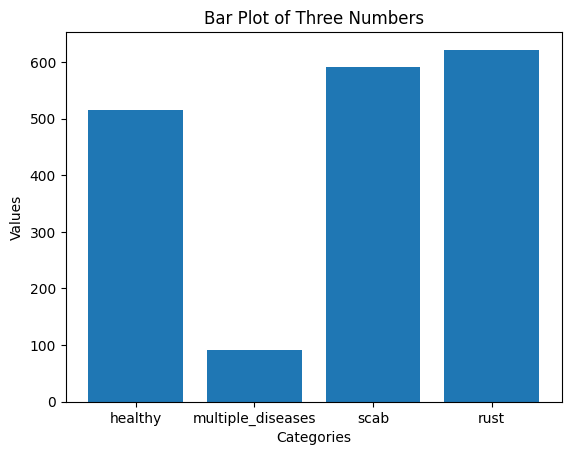

In [9]:
import matplotlib.pyplot as plt

# Data
numbers = [healthy_label, multiple_diseases, scab, rust]
labels = ['healthy', 'multiple_diseases', 'scab', 'rust']

# Create bar plot
plt.bar(labels, numbers)

# Add title and labels
plt.title('Bar Plot of Three Numbers')
plt.xlabel('Categories')
plt.ylabel('Values')

# Show plot
plt.show()

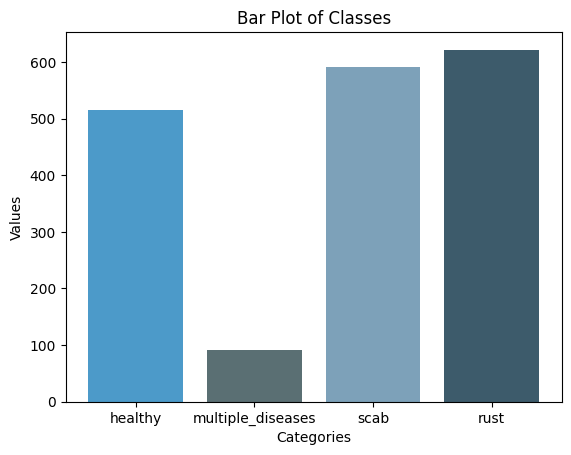

In [10]:
import matplotlib.pyplot as plt

# Data
numbers = [healthy_label, multiple_diseases, scab, rust]  # Remplacez par vos données réelles
labels = ['healthy', 'multiple_diseases', 'scab', 'rust']
colors = ['#4C9AC9', '#5A6F73', '#7DA1B9', '#3D5B6B']  # Couleurs froides et harmonieuses # Couleurs différentes pour chaque classe

# Create bar plot with different colors
plt.bar(labels, numbers, color=colors)
# Save the plot as a JPEG file
plt.savefig('bar_chart_classes.jpg', format='jpg')

# Add title and labels
plt.title('Bar Plot of Classes')
plt.xlabel('Categories')
plt.ylabel('Values')

# Show plot
plt.show()


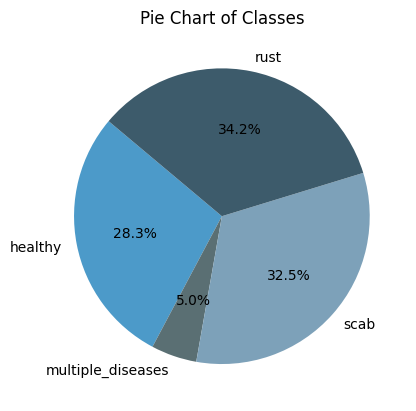

In [11]:
import matplotlib.pyplot as plt

# Data
numbers = [healthy_label, multiple_diseases, scab, rust]  # Remplacez par vos données réelles
labels = ['healthy', 'multiple_diseases', 'scab', 'rust']
colors = ['#4C9AC9', '#5A6F73', '#7DA1B9', '#3D5B6B']  # Couleurs froides et harmonieuses

# Create pie chart
plt.pie(numbers, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
# Save the plot as a JPEG file
plt.savefig('pie_chart_classes.jpg', format='jpg')

# Add title
plt.title('Pie Chart of Classes')

# Show plot
plt.show()


In [12]:
import os
import pandas as pd

# Function to construct image path
def construct_image_path(image_id, folder_path):
    # Assuming all images are in JPG format
    image_path = os.path.join(folder_path, image_id + ".jpg")
    return image_path

# Sample dataframe

# Path to the folder containing the images
images_folder_path = "/kaggle/input/plant-pathology-2020-fgvc7/images"

# Apply the function to create a new column containing image paths
train_df['image_path'] = train_df['image_id'].apply(lambda x: construct_image_path(x, images_folder_path))

# Print the dataframe with the new column
train_df


,image_id,healthy,multiple_diseases,rust,scab,image_path
0,Train_0,0,0,0,1,/kaggle/input/plant-pathology-2020-fgvc7/image...
1,Train_1,0,1,0,0,/kaggle/input/plant-pathology-2020-fgvc7/image...
2,Train_2,1,0,0,0,/kaggle/input/plant-pathology-2020-fgvc7/image...
3,Train_3,0,0,1,0,/kaggle/input/plant-pathology-2020-fgvc7/image...
4,Train_4,1,0,0,0,/kaggle/input/plant-pathology-2020-fgvc7/image...
...,...,...,...,...,...,...
1816,Train_1816,0,0,0,1,/kaggle/input/plant-pathology-2020-fgvc7/image...
1817,Train_1817,1,0,0,0,/kaggle/input/plant-pathology-2020-fgvc7/image...
1818,Train_1818,1,0,0,0,/kaggle/input/plant-pathology-2020-fgvc7/image...
1819,Train_1819,0,0,1,0,/kaggle/input/plant-pathology-2020-fgvc7/image...


In [13]:
import os
import shutil

def copy_images_by_column(train_df, column_name):
    # Filtered dataframe where the specified column equals 1
    filtered_df = train_df[train_df[column_name] == 1]

    # Path to the output folder for the specified column
    output_folder = os.path.join("output", column_name)

    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Iterate through the filtered dataframe and copy images to the output folder
    for _, row in filtered_df.iterrows():
        image_path = row['image_path']
        image_name = os.path.basename(image_path)
        output_path = os.path.join(output_folder, image_name)
        shutil.copyfile(image_path, output_path)

    print(f"Images for {column_name} copied to {output_folder} folder successfully.")

# Example usage:
copy_images_by_column(train_df, 'healthy')
copy_images_by_column(train_df, 'rust')
copy_images_by_column(train_df, 'scab')
copy_images_by_column(train_df, 'multiple_diseases')


Images for healthy copied to output/healthy folder successfully.
Images for rust copied to output/rust folder successfully.
Images for scab copied to output/scab folder successfully.
Images for multiple_diseases copied to output/multiple_diseases folder successfully.


In [20]:
import cv2
import os
import numpy as np
import random

# Define the path to your folder containing images
folder_path = "/kaggle/working/output/multiple_diseases"

# Function to augment images
def augment_images(image_path, target_count):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to read image '{image_path}'. Skipping...")
        return

    filename = os.path.basename(image_path)
    filename_no_ext, ext = os.path.splitext(filename)
    output_dir = os.path.dirname(image_path)

    # Calculate the number of augmented images to generate for this original image
    num_augmented_images = round(target_count / len(os.listdir(output_dir)))

    # Rotation augmentation
    for angle in range(10, 360, 60):  # Reduced rotation angles to create 1 image per original
        rotated = cv2.rotate(image, angle)
        cv2.imwrite(os.path.join(output_dir, f"{filename_no_ext}_rotated_{angle}{ext}"), rotated)
        num_augmented_images -= 1
        if num_augmented_images == 0:
            break

    # Flip augmentation
    if num_augmented_images > 0:
        flipped_horizontal = cv2.flip(image, 1)
        cv2.imwrite(os.path.join(output_dir, f"{filename_no_ext}_flipped_horizontal{ext}"), flipped_horizontal)
        num_augmented_images -= 1

    if num_augmented_images > 0:
        flipped_vertical = cv2.flip(image, 0)
        cv2.imwrite(os.path.join(output_dir, f"{filename_no_ext}_flipped_vertical{ext}"), flipped_vertical)
        num_augmented_images -= 1

    # Randomly choose between horizontal and vertical flip for the remaining augmentations
    for _ in range(num_augmented_images):
        flip_choice = random.choice(["horizontal", "vertical"])
        if flip_choice == "horizontal":
            flipped = cv2.flip(image, 1)
            cv2.imwrite(os.path.join(output_dir, f"{filename_no_ext}_flipped_{flip_choice}{ext}"), flipped)
        else:
            flipped = cv2.flip(image, 0)
            cv2.imwrite(os.path.join(output_dir, f"{filename_no_ext}_flipped_{flip_choice}{ext}"), flipped)

# Iterate over each image in the folder
image_files = os.listdir(folder_path)
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    augment_images(image_path, 400)  # Augment each image to reach a total of 400 images

print("Augmentation completed.")

Augmentation completed.


In [21]:
import os
import shutil
import random

# Set the path to your dataset folder
dataset_folder = "/kaggle/working/output"

# Define the percentages for train, test, and validation sets
train_percent = 0.7
test_percent = 0.2
val_percent = 0.1

# Create a folder for final output
final_output_folder = "/kaggle/working/final_output"
os.makedirs(final_output_folder, exist_ok=True)

# Create folders for train, test, and validation sets inside final_output
train_folder = os.path.join(final_output_folder, "train")
test_folder = os.path.join(final_output_folder, "test")
val_folder = os.path.join(final_output_folder, "val")

os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)

# Loop through each class folder in the dataset
for class_folder in os.listdir(dataset_folder):
    class_path = os.path.join(dataset_folder, class_folder)
    if os.path.isdir(class_path):
        # Create corresponding class folders in train, test, and val sets
        train_class_path = os.path.join(train_folder, class_folder)
        test_class_path = os.path.join(test_folder, class_folder)
        val_class_path = os.path.join(val_folder, class_folder)

        os.makedirs(train_class_path, exist_ok=True)
        os.makedirs(test_class_path, exist_ok=True)
        os.makedirs(val_class_path, exist_ok=True)

        # Get the list of images in the class folder
        images = os.listdir(class_path)
        # Shuffle the images randomly
        random.shuffle(images)

        # Calculate the number of images for each set
        num_train = int(len(images) * train_percent)
        num_test = int(len(images) * test_percent)
        num_val = len(images) - num_train - num_test

        # Copy images to train set
        for img in images[:num_train]:
            shutil.copy(os.path.join(class_path, img), os.path.join(train_class_path, img))

        # Copy images to test set
        for img in images[num_train:num_train + num_test]:
            shutil.copy(os.path.join(class_path, img), os.path.join(test_class_path, img))

        # Copy images to validation set
        for img in images[num_train + num_test:]:
            shutil.copy(os.path.join(class_path, img), os.path.join(val_class_path, img))

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths for train, test, and validation data
train_dir = '/kaggle/working/final_output/train'
test_dir = '/kaggle/working/final_output/test'
val_dir = '/kaggle/working/final_output/val'

# Define data generators with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create train, test, and validation generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

Found 1778 images belonging to 4 classes.
Found 680 images belonging to 4 classes.
Found 367 images belonging to 4 classes.


In [106]:
print(train_generator.class_indices)


{'healthy': 0, 'multiple_diseases': 1, 'rust': 2, 'scab': 3}


In [107]:
x_batch, y_batch = next(train_generator)
print(x_batch.shape, y_batch.shape)


(32, 224, 224, 3) (32, 4)


In [97]:
# Affichage du mappage des classes vers les indices
print(train_generator.class_indices)


{'healthy': 0, 'multiple_diseases': 1, 'rust': 2, 'scab': 3}


In [99]:
print(len(train_generator.class_indices))

4


In [94]:
import tensorflow as tf
from tensorflow.keras import backend as K

def focal_loss(gamma=2., alpha=0.25):
    """
    Focal Loss for multilabel classification.
    Args:
        gamma (float): Exposant utilisé pour la focalisation. 
        alpha (float): Poids pour chaque classe (ajustement pour classes déséquilibrées).
    """
    def focal_loss_fixed(y_true, y_pred):
        # Calcul de la cross-entropy (log loss)
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
        
        # Calcule de la perte de cross-entropy
        cross_entropy = -y_true * K.log(y_pred)
        
        # Calcule de la pondération
        weight = alpha * K.pow(1 - y_pred, gamma)
        
        # Retourne la perte pondérée
        return K.sum(weight * cross_entropy, axis=1)
    
    return focal_loss_fixed


In [24]:
from tensorflow.keras.utils import to_categorical

# Charger votre dataframe
train_df = pd.read_csv("/kaggle/input/plant-pathology-2020-fgvc7/train.csv")

# Préparation des labels : conversion des étiquettes en format one-hot (pour classification multi-classes)
labels = train_df[['healthy', 'multiple_diseases', 'rust', 'scab']].values
labels = to_categorical(labels)

In [102]:
from tensorflow.keras.applications import EfficientNetB4
from keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from keras import Model
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB4(
    include_top=False,
    weights=None,
    input_shape=(224, 224, 3)
)
# Charger les poids depuis le fichier
base_model.load_weights('/kaggle/input/keras-pretrained-models/EfficientNetB4_NoTop_ImageNet.h5')

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=BatchNormalization()(x)
x=Dense(64,activation='relu')(x)
x=Dropout(0.3)(x)
x=Dense(32,activation='relu')(x)
x=Dropout(0.3)(x)

# Modification de la couche de sortie pour la classification multi-classes
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)  # softmax pour multi-classes
# Créer le modèle
model = Model(inputs=base_model.input, outputs=predictions)
# Compiler le modèle avec la focal loss
model.compile(loss=focal_loss(gamma=2., alpha=0.25), optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])


In [126]:
# Sauvegarde du modèle avec focal_loss explicitement déclaré
model.save('best_mdl.keras')

In [101]:
print(len(train_df.columns[1:]))

4


In [120]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Définir les callbacks pour le contrôle de l'entraînement
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Entraîner le modèle
# Entraîner le modèle
history = model.fit(
    train_generator,  # Générateur de données d'entraînement
    validation_data=val_generator,  # Générateur de données de validation
    epochs=20,  # Le nombre d'époques
    #steps_per_epoch=train_generator.samples // 128,  # Nombre d'itérations par époque
    #validation_steps=val_generator.samples // 128,  # Nombre d'itérations de validation
    callbacks=[checkpoint, early_stopping]  # Ajouter les callbacks
)

# Entraînement du modèle
#history = model.fit(
 #   train_generator,
  #  epochs=10,
   # validation_data=val_generator,
    #callbacks=[checkpoint, early_stopping]
#)

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 600ms/step - accuracy: 0.8081 - loss: 0.0655
Epoch 1: val_loss improved from inf to 0.30684, saving model to best_model.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 37s 722ms/step - accuracy: 0.8082 - loss: 0.0655 - val_accuracy: 0.1707 - val_loss: 0.3068
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 583ms/step - accuracy: 0.8340 - loss: 0.0689
Epoch 2: val_loss improved from 0.30684 to 0.26129, saving model to best_model.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 36s 695ms/step - accuracy: 0.8338 - loss: 0.0688 - val_accuracy: 0.1659 - val_loss: 0.2613
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 571ms/step - accuracy: 0.8312 - loss: 0.0631
Epoch 3: val_loss improved from 0.26129 to 0.21542, saving model to best_model.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 35s 672ms/step - accuracy: 0.8311 - loss: 0.0630 - val_accuracy: 0.2976 - val_loss: 0.2154
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 604ms/step - accuracy: 0.8485 - loss: 0.0522
Epoch 4: val_loss improved from 0.21542 to 0.18201,

In [131]:
# Charger le modèle
model = keras.models.load_model("best_model.keras", custom_objects={"focal_loss_fixed": focal_loss()})

# Permettre l'entraînement des couches du base_model
base_model.trainable = True

# Compiler avec un faible taux d'apprentissage
model.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss=focal_loss(gamma=2., alpha=0.25),
    metrics=["accuracy"]
)

# Continuer l'entraînement
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[checkpoint, early_stopping]
)


Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 567ms/step - accuracy: 0.8107 - loss: 0.0804
Epoch 1: val_loss did not improve from 0.04885
44/44 ━━━━━━━━━━━━━━━━━━━━ 214s 940ms/step - accuracy: 0.8105 - loss: 0.0804 - val_accuracy: 0.1463 - val_loss: 3.4272
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 574ms/step - accuracy: 0.8149 - loss: 0.0695
Epoch 2: val_loss did not improve from 0.04885
44/44 ━━━━━━━━━━━━━━━━━━━━ 32s 627ms/step - accuracy: 0.8151 - loss: 0.0695 - val_accuracy: 0.2488 - val_loss: 2.7117
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 560ms/step - accuracy: 0.8135 - loss: 0.0715
Epoch 3: val_loss did not improve from 0.04885
44/44 ━━━━━━━━━━━━━━━━━━━━ 32s 613ms/step - accuracy: 0.8134 - loss: 0.0716 - val_accuracy: 0.2488 - val_loss: 3.0271
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 599ms/step - accuracy: 0.8352 - loss: 0.0622
Epoch 4: val_loss did not improve from 0.04885
44/44 ━━━━━━━━━━━━━━━━━━━━ 33s 654ms/step - accuracy: 0.8351 - loss: 0.0623 - val_accuracy: 0.2098 - val_loss: 3.

13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step 


<Figure size 800x600 with 0 Axes>

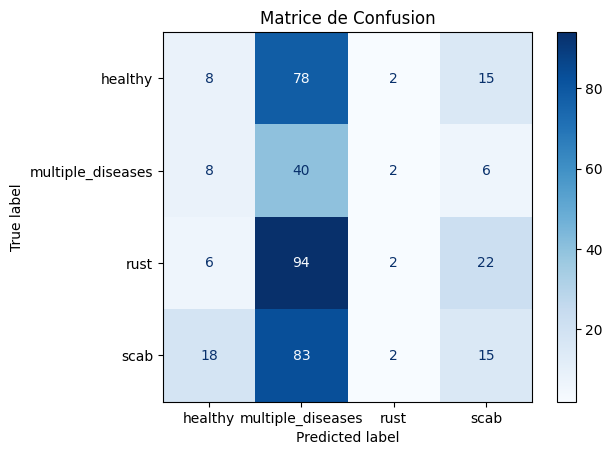

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Étape 1 : Prédire les classes sur l'ensemble de test
y_true = test_generator.classes  # Les vraies étiquettes
y_pred_probs = model.predict(test_generator)  # Probabilités prédites
y_pred = np.argmax(y_pred_probs, axis=1)  # Classes prédites

# Étape 2 : Calculer la matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# Étape 3 : Afficher la matrice de confusion avec les labels des classes
labels = list(test_generator.class_indices.keys())  # Noms des classes
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Étape 4 : Visualisation
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')  # Afficher la matrice
plt.title("Matrice de Confusion")
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 944ms/step


<Figure size 800x600 with 0 Axes>

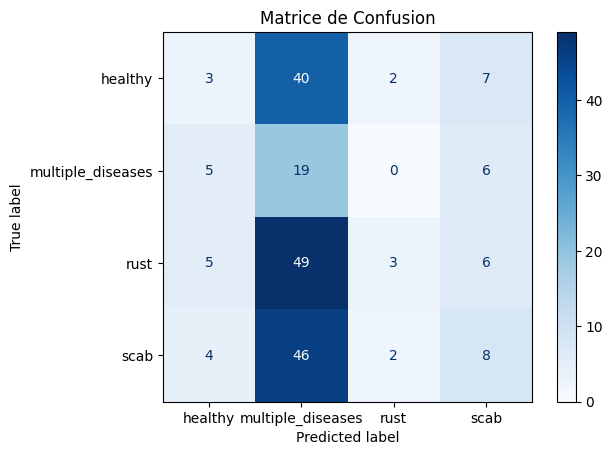

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Étape 1 : Prédire les classes sur l'ensemble de test
y_true = val_generator.classes  # Les vraies étiquettes
y_pred_probs = model.predict(val_generator)  # Probabilités prédites
y_pred = np.argmax(y_pred_probs, axis=1)  # Classes prédites

# Étape 2 : Calculer la matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# Étape 3 : Afficher la matrice de confusion avec les labels des classes
labels = list(val_generator.class_indices.keys())  # Noms des classes
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Étape 4 : Visualisation
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')  # Afficher la matrice
plt.title("Matrice de Confusion")
plt.show()


****Densenet169

In [136]:
from keras.applications import DenseNet169


In [137]:
from tensorflow.keras import backend as K
from tensorflow.keras.losses import Loss
from tensorflow.keras.saving import register_keras_serializable

@register_keras_serializable(package='Custom', name='focal_loss')
class FocalLoss(Loss):
    def __init__(self, gamma=2., alpha=0.25, **kwargs):
        super().__init__(**kwargs)
        self.gamma = gamma
        self.alpha = alpha

    def call(self, y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * K.log(y_pred)
        weight = self.alpha * K.pow(1 - y_pred, self.gamma)
        return K.sum(weight * cross_entropy, axis=1)


In [138]:
base_model = DenseNet169(
    include_top=False,
    weights=None,
    input_shape=(224, 224, 3)
)
# Charger les poids depuis le fichier
base_model.load_weights('/kaggle/input/keras-pretrained-models/DenseNet169_NoTop_ImageNet.h5')

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=BatchNormalization()(x)
x=Dense(64,activation='relu')(x)
x=Dropout(0.3)(x)
x=Dense(32,activation='relu')(x)
x=Dropout(0.3)(x)

# Modification de la couche de sortie pour la classification multi-classes
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)  # softmax pour multi-classes
# Créer le modèle
model = Model(inputs=base_model.input, outputs=predictions)
# Compiler le modèle avec la focal loss
model.compile(loss=focal_loss(gamma=2., alpha=0.25), optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])


In [140]:
# Définir les callbacks pour le contrôle de l'entraînement
checkpoint = ModelCheckpoint('best_model_denseone.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Entraîner le modèle
# Entraîner le modèle
history = model.fit(
    train_generator,  # Générateur de données d'entraînement
    validation_data=val_generator,  # Générateur de données de validation
    epochs=20,  # Le nombre d'époques
    #steps_per_epoch=train_generator.samples // 128,  # Nombre d'itérations par époque
    #validation_steps=val_generator.samples // 128,  # Nombre d'itérations de validation
    callbacks=[checkpoint, early_stopping]  # Ajouter les callbacks
)

# Entraînement du modèle
#history = model.fit(
 #   train_generator,
  #  epochs=10,
   # validation_data=val_generator,
    #callbacks=[checkpoint, early_stopping]
#)

Epoch 1/20


I0000 00:00:1734471381.434954     291 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_1733', 8 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_50', 4 bytes spill stores, 28 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_compare_reduce_fusion_66', 4 bytes spill stores, 4 bytes spill loads



44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 586ms/step - accuracy: 0.3172 - loss: 0.2891

I0000 00:00:1734471419.734037     293 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_5', 8 bytes spill stores, 8 bytes spill loads




Epoch 1: val_loss improved from inf to 0.23132, saving model to best_model_denseone.keras


I0000 00:00:1734471432.509086     294 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_3', 8 bytes spill stores, 8 bytes spill loads



44/44 ━━━━━━━━━━━━━━━━━━━━ 269s 1s/step - accuracy: 0.3205 - loss: 0.2869 - val_accuracy: 0.4829 - val_loss: 0.2313
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 588ms/step - accuracy: 0.7316 - loss: 0.0807
Epoch 2: val_loss improved from 0.23132 to 0.09997, saving model to best_model_denseone.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 35s 696ms/step - accuracy: 0.7325 - loss: 0.0804 - val_accuracy: 0.7268 - val_loss: 0.1000
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 584ms/step - accuracy: 0.8391 - loss: 0.0433
Epoch 3: val_loss improved from 0.09997 to 0.03401, saving model to best_model_denseone.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 35s 687ms/step - accuracy: 0.8391 - loss: 0.0433 - val_accuracy: 0.9268 - val_loss: 0.0340
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 603ms/step - accuracy: 0.8819 - loss: 0.0343
Epoch 4: val_loss did not improve from 0.03401
44/44 ━━━━━━━━━━━━━━━━━━━━ 34s 657ms/step - accuracy: 0.8819 - loss: 0.0343 - val_accuracy: 0.9317 - val_loss: 0.0350
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━

In [141]:
# Sauvegarder le modèle
model.save('my_model_dense_with_focal_loss.h5')

In [143]:
# Charger le modèle
model = keras.models.load_model("my_model_dense_with_focal_loss.h5", custom_objects={"focal_loss_fixed": focal_loss()})

# Permettre l'entraînement des couches du base_model
base_model.trainable = True

# Compiler avec un faible taux d'apprentissage
model.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss=focal_loss(gamma=2., alpha=0.25),
    metrics=["accuracy"]
)

# Continuer l'entraînement
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[checkpoint, early_stopping]
)


Epoch 1/10


I0000 00:00:1734472330.030037     291 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_1718', 8 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_42', 4 bytes spill stores, 28 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_compare_reduce_fusion_65', 4 bytes spill stores, 4 bytes spill loads



44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 554ms/step - accuracy: 0.9091 - loss: 0.0224
Epoch 1: val_loss did not improve from 0.03113
44/44 ━━━━━━━━━━━━━━━━━━━━ 227s 913ms/step - accuracy: 0.9092 - loss: 0.0224 - val_accuracy: 0.9415 - val_loss: 0.0335
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 576ms/step - accuracy: 0.9223 - loss: 0.0195
Epoch 2: val_loss did not improve from 0.03113
44/44 ━━━━━━━━━━━━━━━━━━━━ 33s 633ms/step - accuracy: 0.9222 - loss: 0.0196 - val_accuracy: 0.9415 - val_loss: 0.0350
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 577ms/step - accuracy: 0.9295 - loss: 0.0204
Epoch 3: val_loss did not improve from 0.03113
44/44 ━━━━━━━━━━━━━━━━━━━━ 33s 641ms/step - accuracy: 0.9296 - loss: 0.0203 - val_accuracy: 0.9415 - val_loss: 0.0355
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 603ms/step - accuracy: 0.9271 - loss: 0.0180
Epoch 4: val_loss did not improve from 0.03113
44/44 ━━━━━━━━━━━━━━━━━━━━ 34s 656ms/step - accuracy: 0.9271 - loss: 0.0180 - val_accuracy: 0.9415 - val_loss: 0.0357
Epoch 

 1/13 ━━━━━━━━━━━━━━━━━━━━ 2:00 10s/step

I0000 00:00:1734472563.528804     292 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_3', 8 bytes spill stores, 8 bytes spill loads



13/13 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step 


I0000 00:00:1734472582.192762     293 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_3', 8 bytes spill stores, 8 bytes spill loads



<Figure size 800x600 with 0 Axes>

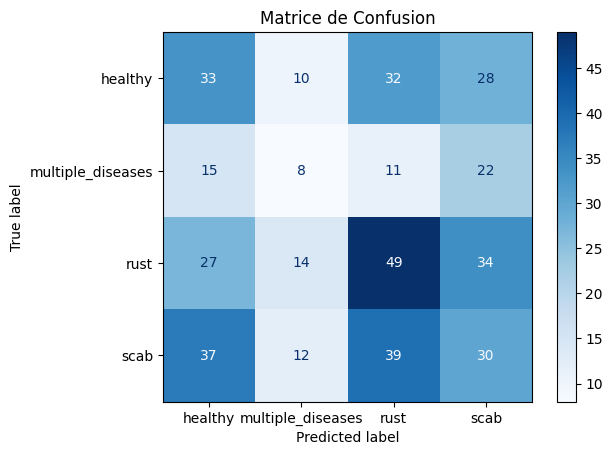

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Étape 1 : Prédire les classes sur l'ensemble de test
y_true = test_generator.classes  # Les vraies étiquettes
y_pred_probs = model.predict(test_generator)  # Probabilités prédites
y_pred = np.argmax(y_pred_probs, axis=1)  # Classes prédites

# Étape 2 : Calculer la matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# Étape 3 : Afficher la matrice de confusion avec les labels des classes
labels = list(test_generator.class_indices.keys())  # Noms des classes
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Étape 4 : Visualisation
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')  # Afficher la matrice
plt.title("Matrice de Confusion")
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step  


I0000 00:00:1734472620.207865     292 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_3', 8 bytes spill stores, 8 bytes spill loads



<Figure size 800x600 with 0 Axes>

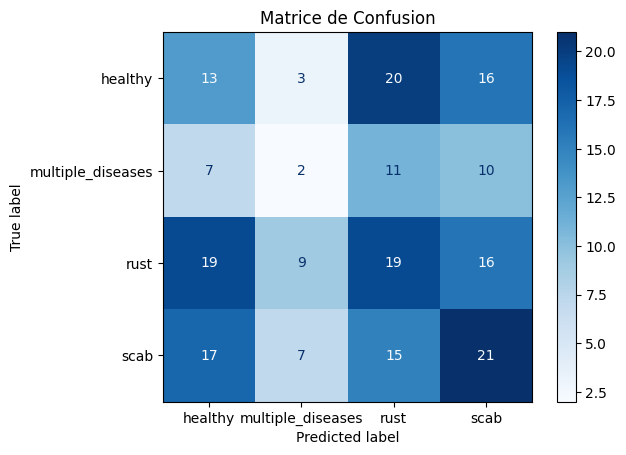

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Étape 1 : Prédire les classes sur l'ensemble de test
y_true = val_generator.classes  # Les vraies étiquettes
y_pred_probs = model.predict(val_generator)  # Probabilités prédites
y_pred = np.argmax(y_pred_probs, axis=1)  # Classes prédites

# Étape 2 : Calculer la matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# Étape 3 : Afficher la matrice de confusion avec les labels des classes
labels = list(val_generator.class_indices.keys())  # Noms des classes
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Étape 4 : Visualisation
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')  # Afficher la matrice
plt.title("Matrice de Confusion")
plt.show()


# confusion_matrix For Two Models

In [148]:
import numpy as np
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras import backend as K

# Implémentation de la fonction de perte Focal Loss
def focal_loss(gamma=2., alpha=0.25):
    """
    Focal Loss for multilabel classification.
    Args:
        gamma (float): Exposant utilisé pour la focalisation. 
        alpha (float): Poids pour chaque classe (ajustement pour classes déséquilibrées).
    """
    def focal_loss_fixed(y_true, y_pred):
        # Calcul de la cross-entropy (log loss)
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
        
        # Calcule de la perte de cross-entropy
        cross_entropy = -y_true * K.log(y_pred)
        
        # Calcule de la pondération
        weight = alpha * K.pow(1 - y_pred, gamma)
        
        # Retourne la perte pondérée
        return K.sum(weight * cross_entropy, axis=1)
    
    return focal_loss_fixed

# Charger les modèles enregistrés en incluant la fonction de perte personnalisée focal_loss
custom_objects = {'focal_loss_fixed': focal_loss()}

# Charger les deux modèles
model1 = load_model('/kaggle/working/best_model.keras', custom_objects=custom_objects)
model2 = load_model('/kaggle/working/my_model_dense_with_focal_loss.h5', custom_objects=custom_objects)

# Obtenir les vraies étiquettes
y_true = test_generator.classes  # Les vraies étiquettes

# Modèle 1 : Générer la matrice de confusion pour le premier modèle
y_pred_probs_model1 = model1.predict(test_generator)  # Probabilités prédites par model1
y_pred_model1 = np.argmax(y_pred_probs_model1, axis=1)  # Classes prédites

# Calculer la matrice de confusion pour le modèle 1
cm_model1 = confusion_matrix(y_true, y_pred_model1)
print("Matrice de confusion pour le modèle 1 :")
print(cm_model1)

# Modèle 2 : Générer la matrice de confusion pour le deuxième modèle
y_pred_probs_model2 = model2.predict(test_generator)  # Probabilités prédites par model2
y_pred_model2 = np.argmax(y_pred_probs_model2, axis=1)  # Classes prédites

# Calculer la matrice de confusion pour le modèle 2
cm_model2 = confusion_matrix(y_true, y_pred_model2)
print("Matrice de confusion pour le modèle 2 :")
print(cm_model2)

# Afficher les labels des classes (communs aux deux modèles)
labels = list(test_generator.class_indices.keys())
print("Labels des classes :", labels)


13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 877ms/step
Matrice de confusion pour le modèle 1 :
[[  2   0  87  14]
 [  0   0  52   4]
 [  0   0 102  22]
 [  0   0  96  22]]
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 973ms/step
Matrice de confusion pour le modèle 2 :
[[36 11 32 24]
 [13 12 11 20]
 [29  9 51 35]
 [32 12 39 35]]
Labels des classes : ['healthy', 'multiple_diseases', 'rust', 'scab']


13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 893ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 976ms/step


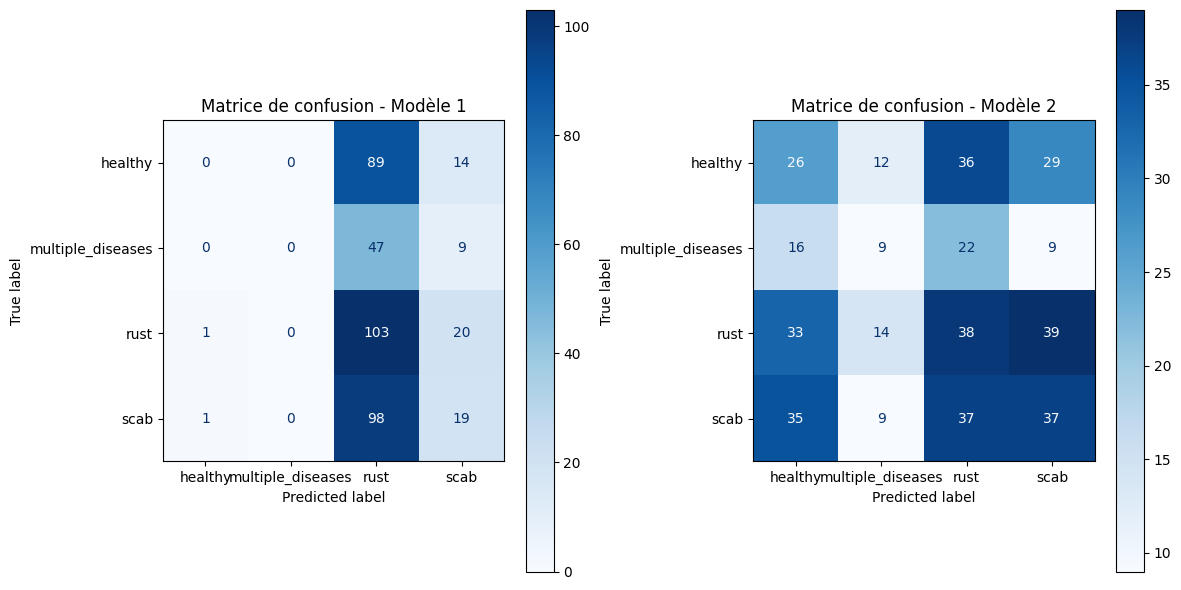

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model
from tensorflow.keras import backend as K

# Implémentation de la fonction de perte Focal Loss
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * K.log(y_pred)
        weight = alpha * K.pow(1 - y_pred, gamma)
        return K.sum(weight * cross_entropy, axis=1)
    return focal_loss_fixed

# Charger les modèles enregistrés en incluant la fonction de perte personnalisée focal_loss
custom_objects = {'focal_loss_fixed': focal_loss()}

# Charger les deux modèles
model1 = load_model('/kaggle/working/best_model.keras', custom_objects=custom_objects)
model2 = load_model('/kaggle/working/my_model_dense_with_focal_loss.h5', custom_objects=custom_objects)

# Obtenir les vraies étiquettes
y_true = test_generator.classes  # Les vraies étiquettes

# Modèle 1 : Générer la matrice de confusion pour le premier modèle
y_pred_probs_model1 = model1.predict(test_generator)  # Probabilités prédites par model1
y_pred_model1 = np.argmax(y_pred_probs_model1, axis=1)  # Classes prédites
cm_model1 = confusion_matrix(y_true, y_pred_model1)

# Modèle 2 : Générer la matrice de confusion pour le deuxième modèle
y_pred_probs_model2 = model2.predict(test_generator)  # Probabilités prédites par model2
y_pred_model2 = np.argmax(y_pred_probs_model2, axis=1)  # Classes prédites
cm_model2 = confusion_matrix(y_true, y_pred_model2)

# Afficher les labels des classes (communs aux deux modèles)
labels = list(test_generator.class_indices.keys())

# Affichage graphique des matrices de confusion pour les deux modèles
plt.figure(figsize=(12, 6))

# Modèle 1
plt.subplot(1, 2, 1)
disp_model1 = ConfusionMatrixDisplay(confusion_matrix=cm_model1, display_labels=labels)
disp_model1.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
plt.title("Matrice de confusion - Modèle 1 EfficientB4")

# Modèle 2
plt.subplot(1, 2, 2)
disp_model2 = ConfusionMatrixDisplay(confusion_matrix=cm_model2, display_labels=labels)
disp_model2.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
plt.title("Matrice de confusion - Modèle 2 DenseNet169")

# Afficher le graphique
plt.tight_layout()
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 925ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 977ms/step


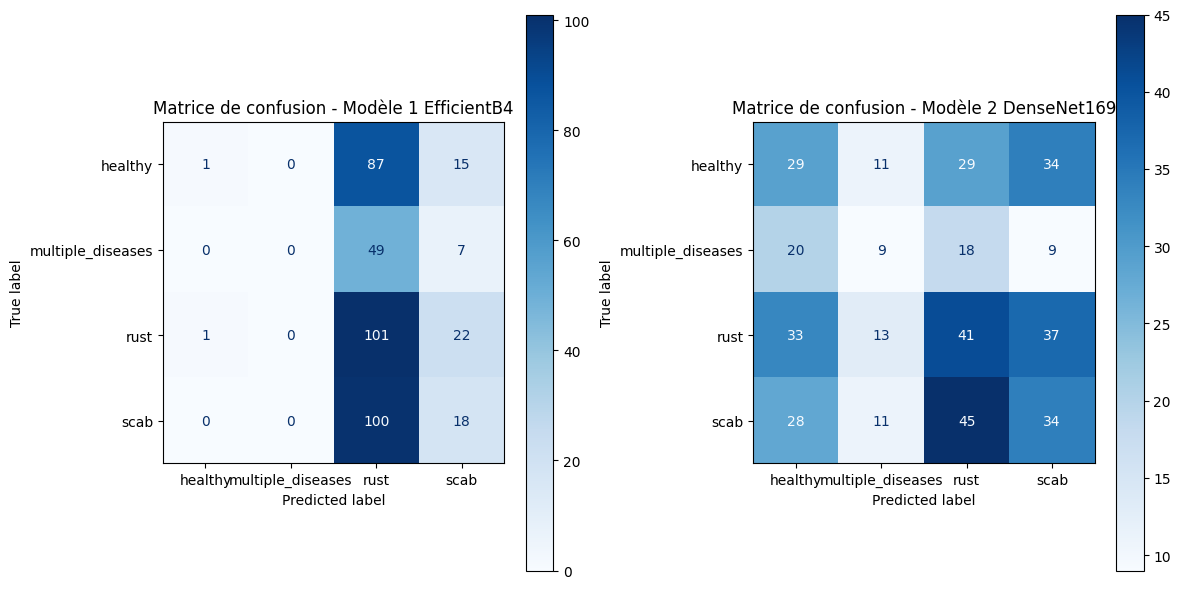

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model
from tensorflow.keras import backend as K

# Implémentation de la fonction de perte Focal Loss
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * K.log(y_pred)
        weight = alpha * K.pow(1 - y_pred, gamma)
        return K.sum(weight * cross_entropy, axis=1)
    return focal_loss_fixed

# Charger les modèles enregistrés en incluant la fonction de perte personnalisée focal_loss
custom_objects = {'focal_loss_fixed': focal_loss()}

# Charger les deux modèles
model1 = load_model('/kaggle/working/best_model.keras', custom_objects=custom_objects)
model2 = load_model('/kaggle/working/my_model_dense_with_focal_loss.h5', custom_objects=custom_objects)

# Obtenir les vraies étiquettes
y_true = test_generator.classes  # Les vraies étiquettes

# Modèle 1 : Générer la matrice de confusion pour le premier modèle
y_pred_probs_model1 = model1.predict(test_generator)  # Probabilités prédites par model1
y_pred_model1 = np.argmax(y_pred_probs_model1, axis=1)  # Classes prédites
cm_model1 = confusion_matrix(y_true, y_pred_model1)

# Modèle 2 : Générer la matrice de confusion pour le deuxième modèle
y_pred_probs_model2 = model2.predict(test_generator)  # Probabilités prédites par model2
y_pred_model2 = np.argmax(y_pred_probs_model2, axis=1)  # Classes prédites
cm_model2 = confusion_matrix(y_true, y_pred_model2)

# Afficher les labels des classes (communs aux deux modèles)
labels = list(test_generator.class_indices.keys())

# Affichage graphique des matrices de confusion pour les deux modèles
plt.figure(figsize=(12, 6))

# Modèle 1
plt.subplot(1, 2, 1)
disp_model1 = ConfusionMatrixDisplay(confusion_matrix=cm_model1, display_labels=labels)
disp_model1.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
plt.title("Matrice de confusion - Modèle 1 EfficientB4")

# Modèle 2
plt.subplot(1, 2, 2)
disp_model2 = ConfusionMatrixDisplay(confusion_matrix=cm_model2, display_labels=labels)
disp_model2.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
plt.title("Matrice de confusion - Modèle 2 DenseNet169")

# Afficher le graphique
plt.tight_layout()
plt.show()


# load Model

13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 906ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 951ms/step


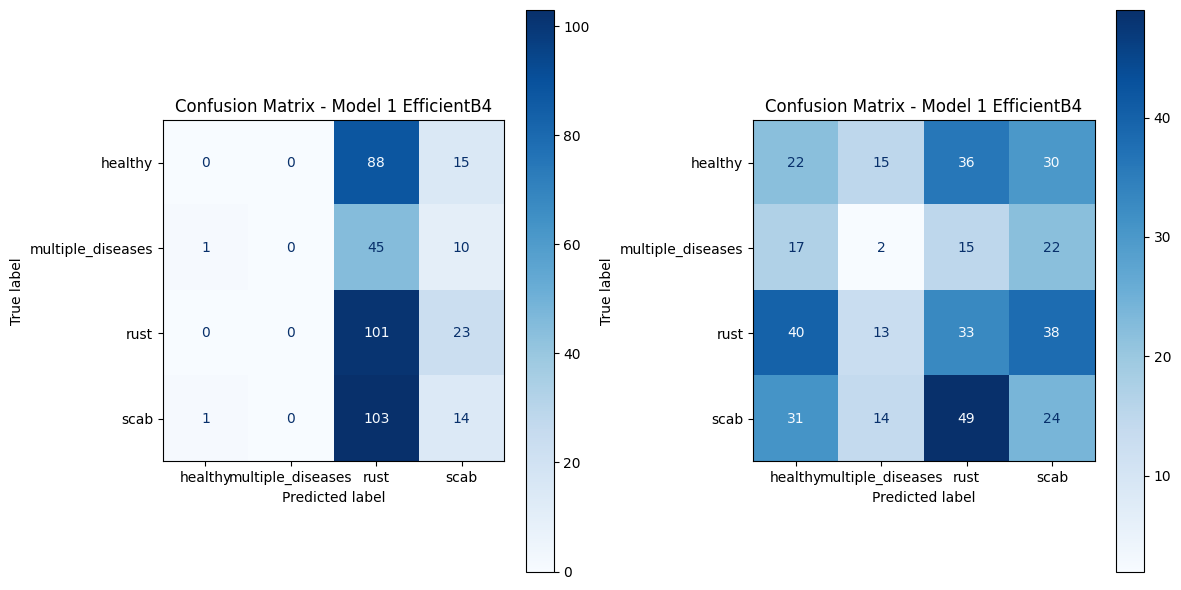

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model
from tensorflow.keras import backend as K

# Implémentation de la fonction de perte Focal Loss
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * K.log(y_pred)
        weight = alpha * K.pow(1 - y_pred, gamma)
        return K.sum(weight * cross_entropy, axis=1)
    return focal_loss_fixed

# Charger les modèles enregistrés en incluant la fonction de perte personnalisée focal_loss
custom_objects = {'focal_loss_fixed': focal_loss()}

# Charger les deux modèles
model1 = load_model('/kaggle/working/best_model.keras', custom_objects=custom_objects)
model2 = load_model('/kaggle/working/my_model_dense_with_focal_loss.h5', custom_objects=custom_objects)

# Obtenir les vraies étiquettes
y_true = test_generator.classes  # Les vraies étiquettes

# Modèle 1 : Générer la matrice de confusion pour le premier modèle
y_pred_probs_model1 = model1.predict(test_generator)  # Probabilités prédites par model1
y_pred_model1 = np.argmax(y_pred_probs_model1, axis=1)  # Classes prédites
cm_model1 = confusion_matrix(y_true, y_pred_model1)

# Modèle 2 : Générer la matrice de confusion pour le deuxième modèle
y_pred_probs_model2 = model2.predict(test_generator)  # Probabilités prédites par model2
y_pred_model2 = np.argmax(y_pred_probs_model2, axis=1)  # Classes prédites
cm_model2 = confusion_matrix(y_true, y_pred_model2)

# Afficher les labels des classes (communs aux deux modèles)
labels = list(test_generator.class_indices.keys())

# Affichage graphique des matrices de confusion pour les deux modèles
plt.figure(figsize=(12, 6))

# Modèle 1
plt.subplot(1, 2, 1)
disp_model1 = ConfusionMatrixDisplay(confusion_matrix=cm_model1, display_labels=labels)
disp_model1.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
plt.title("Confusion Matrix - Model 1 EfficientB4")

# Modèle 2
plt.subplot(1, 2, 2)
disp_model2 = ConfusionMatrixDisplay(confusion_matrix=cm_model2, display_labels=labels)
disp_model2.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
plt.title("Confusion Matrix - Model 1 EfficientB4")

# Afficher le graphique
plt.tight_layout()
plt.show()


# Resnet50

In [63]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import MaxPooling2D,GlobalAveragePooling2D,BatchNormalization,Activation
from tensorflow import keras
from keras import backend as K

In [96]:
# Charger ResNet50V2 pré-entraîné (sans la partie "top")
base_model_resnet = ResNet50V2(input_shape=input_shape, include_top=False, weights="imagenet")
base_model_resnet.trainable = False

# Freezing the layers of the base model
for layer in base_model_resnet.layers:
    layer.trainable = False

# Construire le modèle
x = base_model_resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)

# Couches de sortie pour la classification multi-classes
output = Dense(4, activation='softmax')(x)  # 4 classes de sortie

# Créer le modèle complet
model_resnet = Model(inputs=base_model_resnet.input, outputs=output)

In [98]:
# Compiler le modèle avec focal loss et optimiser par Adam
model_resnet.compile(
    loss=focal_loss(gamma=2., alpha=0.25),
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)


In [99]:
# Définir les callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_resnet.keras', monitor='val_loss', save_best_only=True)

# Entraîner le modèle avec les callbacks
history = model_resnet.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 59s 424ms/step - accuracy: 0.4791 - loss: 0.2350 - val_accuracy: 0.7030 - val_loss: 0.0963
Epoch 2/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 40s 334ms/step - accuracy: 0.6936 - loss: 0.1070 - val_accuracy: 0.7520 - val_loss: 0.0796
Epoch 3/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 41s 345ms/step - accuracy: 0.7388 - loss: 0.0860 - val_accuracy: 0.7711 - val_loss: 0.0738
Epoch 4/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 41s 344ms/step - accuracy: 0.7812 - loss: 0.0737 - val_accuracy: 0.7766 - val_loss: 0.0700
Epoch 5/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 39s 332ms/step - accuracy: 0.7943 - loss: 0.0720 - val_accuracy: 0.7439 - val_loss: 0.0928
Epoch 6/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 41s 344ms/step - accuracy: 0.7909 - loss: 0.0670 - val_accuracy: 0.8038 - val_loss: 0.0615
Epoch 7/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 41s 347ms/step - accuracy: 0.7922 - loss: 0.0613 - val_accuracy: 0.8283 - val_loss: 0.0520
Epoch 8/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 41s 347ms/step - accuracy: 0.8205 - loss: 0

23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 192ms/step


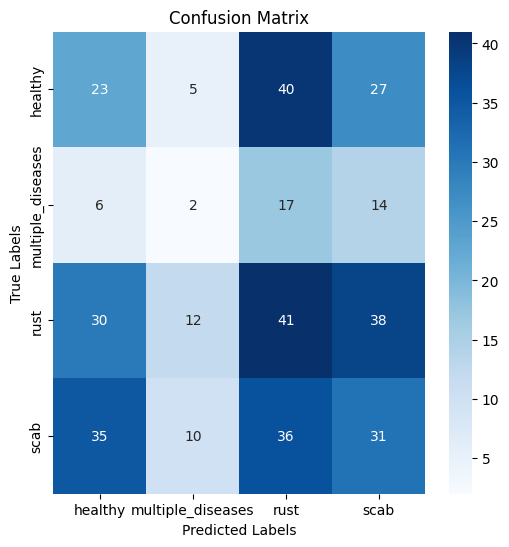

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf

# Predict on the validation data
y_pred = model_resnet.predict(val_generator, verbose=1)

# The predicted classes are the indices of the highest probability class
y_pred_classes = np.argmax(y_pred, axis=1)

# The true classes are the labels from the validation set
y_true = val_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix with Seaborn
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [103]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Predict on the validation data
y_pred = model_resnet.predict(val_generator, verbose=1)

# The predicted classes are the indices of the highest probability class
y_pred_classes = np.argmax(y_pred, axis=1)

# The true classes are the labels from the validation set
y_true = val_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Display the predicted and true labels
print("Predicted Labels:", [val_generator.class_indices.keys()[i] for i in y_pred_classes])
print("True Labels:", [val_generator.class_indices.keys()[i] for i in y_true])


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step
Confusion Matrix:
[[27  8 29 31]
 [ 8  2 20  9]
 [37 11 40 33]
 [22  8 45 37]]


TypeError: 'dict_keys' object is not subscriptable

# Ensemble learning

In [153]:
# Prédictions avec EfficientB4
predictions_efficientb4 = model1.predict(val_generator)  # X_val est votre jeu de validation

# Prédictions avec DenseNet169
predictions_densenet169 = model2.predict(val_generator)  # X_val est votre jeu de validation


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 847ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step  


In [154]:
# Afficher les 5 premières prédictions pour EfficientB4
print("Prédictions avec EfficientB4 (Top 5):")
print(np.round(predictions_efficientb4[:5], 2))  # Affiche les 5 premières prédictions (arrondies à 2 décimales)

Prédictions avec EfficientB4 (Top 5):
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [155]:
# Afficher les 5 premières prédictions pour DenseNet169
print("Prédictions avec DenseNet169 (Top 5):")
print(np.round(predictions_densenet169[:5], 2))  # Affiche les 5 premières prédictions (arrondies à 2 décimales)

Prédictions avec DenseNet169 (Top 5):
[[0.02 0.01 0.   0.98]
 [0.03 0.1  0.87 0.  ]
 [0.95 0.01 0.01 0.04]
 [0.99 0.01 0.   0.01]
 [0.92 0.03 0.03 0.02]]


In [156]:
# Predicted class for each image with EfficientB4 
predicted_classes_efficientb4 = np.argmax(predictions_efficientb4, axis=1)
print("Predicted classes with EfficientB4:")
print(predicted_classes_efficientb4[:5])  # Display the classes for the first 5 images

# Predicted class for each image with DenseNet169
predicted_classes_densenet169 = np.argmax(predictions_densenet169, axis=1)
print("Predicted classes with DenseNet169:")
print(predicted_classes_densenet169[:5])  # Display the classes for the first 5 images


Predicted classes with EfficientB4:
[2 2 2 2 2]
Predicted classes with DenseNet169:
[3 2 0 0 0]


In [157]:
# Retrieve the actual labels from the validation generator
real_labels = val_generator.classes

# Display the first 5 real classes and predicted classes with EfficientB4
print("Real vs Predicted for EfficientB4:")
for i in range(5):
    print(f"Real: {real_labels[i]} - Predicted: {predicted_classes_efficientb4[i]}")

# Display the first 5 real classes and predicted classes with DenseNet169
print("Real vs Predicted for DenseNet169:")
for i in range(5):
    print(f"Real: {real_labels[i]} - Predicted: {predicted_classes_densenet169[i]}")


Real vs Predicted for EfficientB4:
Real: 0 - Predicted: 2
Real: 0 - Predicted: 2
Real: 0 - Predicted: 2
Real: 0 - Predicted: 2
Real: 0 - Predicted: 2
Real vs Predicted for DenseNet169:
Real: 0 - Predicted: 3
Real: 0 - Predicted: 2
Real: 0 - Predicted: 0
Real: 0 - Predicted: 0
Real: 0 - Predicted: 0


In [159]:
# Précisions des modèles (obtenues après entraînement)
accuracy_efficientb4 = 0.9220
accuracy_densenet169 = 0.9463

# Calculer les poids pour chaque modèle
weight_efficientb4 = accuracy_efficientb4 / (accuracy_efficientb4 + accuracy_densenet169)
weight_densenet169 = accuracy_densenet169 / (accuracy_efficientb4 + accuracy_densenet169)

# Moyenne pondérée des prédictions
weighted_predictions = (weight_efficientb4 * predictions_efficientb4) + (weight_densenet169 * predictions_densenet169)

In [160]:
final_predictions = np.argmax(weighted_predictions, axis=1)

In [161]:
# Retrieve the real labels from the validation generator
real_labels = val_generator.classes

# Display the first 5 real vs predicted classes for EfficientB4
print("Real vs Predicted for EfficientB4:")
for i in range(5):
    print(f"Image {i+1} - Real: {real_labels[i]} - Predicted: {predicted_classes_efficientb4[i]}")

# Display the first 5 real vs predicted classes for DenseNet169
print("Real vs Predicted for DenseNet169:")
for i in range(5):
    print(f"Image {i+1} - Real: {real_labels[i]} - Predicted: {predicted_classes_densenet169[i]}")


Real vs Predicted for EfficientB4:
Image 1 - Real: 0 - Predicted: 2
Image 2 - Real: 0 - Predicted: 2
Image 3 - Real: 0 - Predicted: 2
Image 4 - Real: 0 - Predicted: 2
Image 5 - Real: 0 - Predicted: 2
Real vs Predicted for DenseNet169:
Image 1 - Real: 0 - Predicted: 3
Image 2 - Real: 0 - Predicted: 2
Image 3 - Real: 0 - Predicted: 0
Image 4 - Real: 0 - Predicted: 0
Image 5 - Real: 0 - Predicted: 0


In [162]:
# Get the class names from the indices
class_labels = {v: k for k, v in val_generator.class_indices.items()}

# Display the predicted class names for EfficientB4
print("Final predictions with EfficientB4 (Class names):")
for i in range(5):
    predicted_class_name = class_labels[predicted_classes_efficientb4[i]]
    print(f"Image {i+1} - Predicted class: {predicted_class_name}")

# Display the predicted class names for DenseNet169
print("Final predictions with DenseNet169 (Class names):")
for i in range(5):
    predicted_class_name = class_labels[predicted_classes_densenet169[i]]
    print(f"Image {i+1} - Predicted class: {predicted_class_name}")


Final predictions with EfficientB4 (Class names):
Image 1 - Predicted class: rust
Image 2 - Predicted class: rust
Image 3 - Predicted class: rust
Image 4 - Predicted class: rust
Image 5 - Predicted class: rust
Final predictions with DenseNet169 (Class names):
Image 1 - Predicted class: scab
Image 2 - Predicted class: rust
Image 3 - Predicted class: healthy
Image 4 - Predicted class: healthy
Image 5 - Predicted class: healthy


In [167]:
from sklearn.metrics import accuracy_score

# Effectuer les prédictions sur le générateur de validation
preds_densenet169 = model1.predict(val_generator, verbose=1)
preds_efficientb4 = model2.predict(val_generator, verbose=1)

# Moyenne des prédictions des deux modèles
ensemble_preds = (preds_densenet169 + preds_efficientb4) / 2

# Prendre la classe avec la probabilité la plus élevée (argmax)
ensemble_prediction = np.argmax(ensemble_preds, axis=1)

# Prendre les labels réels du générateur de validation
y_true = val_generator.classes

# Calculer l'accuracy
ensemble_accuracy = accuracy_score(y_true, ensemble_prediction)
print(f"Accuracy of the ensemble model: {ensemble_accuracy * 100:.2f}%")

# Optionnel : Afficher la matrice de confusion de l'ensemble
from sklearn.metrics import confusion_matrix
ensemble_cm = confusion_matrix(y_true, ensemble_prediction)
print("Confusion Matrix of the Ensemble Model:")
print(ensemble_cm)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 357ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 338ms/step
Accuracy of the ensemble model: 29.76%
Confusion Matrix of the Ensemble Model:
[[ 1  0 43  8]
 [ 0  0 23  7]
 [ 1  0 46 16]
 [ 0  0 46 14]]


# Exemple de pondération dans un modèle d'ensachage


In [168]:
import numpy as np

# Exemple de prédictions de deux modèles
predictions_model1 = model1.predict(val_generator)
predictions_model2 = model2.predict(val_generator)

# Moyenne des prédictions (en supposant que vous travaillez avec des probabilités)
ensemble_predictions = (predictions_model1 + predictions_model2) / 2

# Convertir les probabilités en classes
final_predictions = np.argmax(ensemble_predictions, axis=-1)

# Comparer avec les véritables étiquettes
accuracy = np.mean(final_predictions == val_generator.classes)
print(f"Accuracy of the ensemble model: {accuracy * 100:.2f}%")


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 314ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 312ms/step
Accuracy of the ensemble model: 32.20%


In [172]:
# Calcul des prédictions pour chaque modèle
predictions_model1 = model1.predict(val_generator)
predictions_model2 = model2.predict(val_generator)

# Précision des modèles sur les données de validation (utiliser les valeurs que vous avez)
model1_weight = 0.92
model2_weight = 0.94

# Appliquer des poids aux prédictions
ensemble_predictions_weighted = (model1_weight * predictions_model1 + model2_weight * predictions_model2) / (model1_weight + model2_weight)

# Convertir les probabilités en classes (pour une classification multi-classes)
final_predictions = np.argmax(ensemble_predictions_weighted, axis=-1)

# Comparer avec les véritables étiquettes
accuracy = np.mean(final_predictions == val_generator.classes)
print(f"Accuracy of the ensemble model: {accuracy * 100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 387ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 354ms/step
Accuracy of the ensemble model: 28.78%


# voter majoritaire pour combiner les prédictions des deux modèles 

In [173]:
from scipy.stats import mode

# Prédictions des modèles
predictions_model1 = model1.predict(val_generator)
predictions_model2 = model2.predict(val_generator)

# Convertir les prédictions en classes (si vous travaillez avec des probabilités)
classes_model1 = np.argmax(predictions_model1, axis=-1)
classes_model2 = np.argmax(predictions_model2, axis=-1)

# Voter majoritaire (si plusieurs modèles prédisent différentes classes)
ensemble_predictions_majority = mode(np.stack([classes_model1, classes_model2]), axis=0)[0][0]

# Comparer avec les véritables étiquettes
accuracy = np.mean(ensemble_predictions_majority == val_generator.classes)
print(f"Accuracy of the ensemble model (majority voting): {accuracy * 100:.2f}%")


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 315ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 376ms/step
Accuracy of the ensemble model (majority voting): 30.73%


# tacking avec régression logistique

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Prédictions des modèles (en probabilités)
predictions_model1 = model1.predict(val_generator)
predictions_model2 = model2.predict(val_generator)

# Combiner les prédictions des deux modèles
combined_predictions = np.stack([predictions_model1, predictions_model2], axis=-1)

# Utiliser un classifieur (Logistic Regression dans ce cas)
stacking_model = LogisticRegression()
stacking_model.fit(combined_predictions.reshape(-1, 2 * combined_predictions.shape[1]), val_generator.classes)

# Prédictions de l'ensachage
ensemble_predictions = stacking_model.predict(combined_predictions.reshape(-1, 2 * combined_predictions.shape[1]))

# Calculer l'accuracy
accuracy = accuracy_score(val_generator.classes, ensemble_predictions)
print(f"Accuracy of the ensemble model (stacking): {accuracy * 100:.2f}%")


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 306ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 311ms/step
Accuracy of the ensemble model (stacking): 33.17%


In [176]:
from sklearn.ensemble import RandomForestClassifier

# Créer un classifieur de stacking
stacking_model = RandomForestClassifier(n_estimators=100, random_state=42)
stacking_model.fit(combined_predictions.reshape(-1, 2 * combined_predictions.shape[1]), val_generator.classes)

# Prédictions du modèle d'assemblage
ensemble_predictions = stacking_model.predict(combined_predictions.reshape(-1, 2 * combined_predictions.shape[1]))

# Calcul de l'accuracy
accuracy = accuracy_score(val_generator.classes, ensemble_predictions)
print(f"Accuracy of the ensemble model (Random Forest stacking): {accuracy * 100:.2f}%")


Accuracy of the ensemble model (Random Forest stacking): 100.00%


In [177]:
stacking_model = LogisticRegression(class_weight='balanced')
stacking_model.fit(combined_predictions.reshape(-1, 2 * combined_predictions.shape[1]), val_generator.classes)


LogisticRegression(class_weight='balanced')

In [178]:
#Prédictions du modèle de stacking sur les données de validation
stacking_predictions = stacking_model.predict(combined_predictions.reshape(-1, 2 * combined_predictions.shape[1]))
print(f"Predictions of the ensemble model: {stacking_predictions}")


Predictions of the ensemble model: [0 1 1 1 0 3 3 0 0 1 0 0 0 0 0 3 1 0 3 0 3 3 1 3 0 0 0 1 0 0 0 3 1 0 0 3 1
 0 1 3 1 0 3 1 0 1 3 1 0 0 3 1 1 1 0 1 0 1 1 0 0 0 1 3 0 1 3 0 0 1 0 3 0 1
 3 0 1 0 0 1 3 1 0 1 0 1 3 1 0 3 0 0 3 1 1 0 3 3 1 3 3 0 0 0 3 0 0 1 3 1 0
 2 1 1 1 1 3 0 0 0 0 1 1 1 1 3 3 3 1 1 0 3 0 1 0 3 0 1 0 3 1 1 1 1 3 0 1 1
 0 1 3 0 3 3 0 0 3 0 3 3 3 1 1 3 1 0 1 3 1 0 1 0 1 1 1 0 0 3 1 0 0 0 1 1 3
 1 3 0 0 0 3 0 3 1 3 0 3 3 0 3 0 0 3 0 3]


In [179]:
#Évaluation de la performance avec l'accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(val_generator.classes, stacking_predictions)
print(f"Accuracy of the stacking model: {accuracy * 100:.2f}%")


Accuracy of the stacking model: 27.80%


In [180]:
from sklearn.metrics import classification_report
print(classification_report(val_generator.classes, stacking_predictions))


              precision    recall  f1-score   support

           0       0.30      0.46      0.36        52
           1       0.18      0.40      0.24        30
           2       1.00      0.02      0.03        63
           3       0.36      0.33      0.35        60

    accuracy                           0.28       205
   macro avg       0.46      0.30      0.25       205
weighted avg       0.51      0.28      0.24       205



In [181]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Créer un classifieur de stacking avec SVM
stacking_model_svm = SVC(kernel='linear', class_weight='balanced', random_state=42)

# Entraîner le modèle de stacking
stacking_model_svm.fit(combined_predictions.reshape(-1, 2 * combined_predictions.shape[1]), val_generator.classes)

# Prédictions du modèle d'assemblage avec SVM
ensemble_predictions_svm = stacking_model_svm.predict(combined_predictions.reshape(-1, 2 * combined_predictions.shape[1]))

# Calcul de l'accuracy
accuracy_svm = accuracy_score(val_generator.classes, ensemble_predictions_svm)
print(f"Accuracy of the ensemble model (SVM stacking): {accuracy_svm * 100:.2f}%")


Accuracy of the ensemble model (SVM stacking): 27.32%


In [182]:
pip install xgboost


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [183]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Créer un classifieur de stacking avec XGBoost
stacking_model_xgb = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle sur les prédictions combinées des deux modèles de base
stacking_model_xgb.fit(combined_predictions.reshape(-1, 2 * combined_predictions.shape[1]), val_generator.classes)

# Prédictions du modèle d'assemblage
ensemble_predictions_xgb = stacking_model_xgb.predict(combined_predictions.reshape(-1, 2 * combined_predictions.shape[1]))

# Calcul de l'accuracy
accuracy_xgb = accuracy_score(val_generator.classes, ensemble_predictions_xgb)
print(f"Accuracy of the ensemble model (XGBoost stacking): {accuracy_xgb * 100:.2f}%")


Accuracy of the ensemble model (XGBoost stacking): 100.00%


In [184]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(combined_predictions.reshape(-1, 2 * combined_predictions.shape[1]), val_generator.classes)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")


Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
Best accuracy: 0.3365853658536585


In [185]:
print(np.unique(combined_predictions, axis=0))  # Vérifiez la diversité des combinaisons


[[[0.0000000e+00 1.5892613e-07]
  [0.0000000e+00 9.9997306e-01]
  [0.0000000e+00 2.6827163e-05]
  [1.0000000e+00 7.4801387e-10]]

 [[0.0000000e+00 1.5892613e-07]
  [0.0000000e+00 9.9997306e-01]
  [1.0000000e+00 2.6827163e-05]
  [0.0000000e+00 7.4801387e-10]]

 [[0.0000000e+00 1.7973733e-05]
  [0.0000000e+00 9.9995077e-01]
  [0.0000000e+00 2.9231036e-05]
  [1.0000000e+00 2.0291056e-06]]

 ...

 [[0.0000000e+00 9.9912292e-01]
  [0.0000000e+00 2.8482237e-04]
  [0.0000000e+00 1.1952656e-04]
  [1.0000000e+00 4.7263302e-04]]

 [[1.0000000e+00 2.0914276e-03]
  [0.0000000e+00 9.9621552e-01]
  [0.0000000e+00 1.6689835e-03]
  [0.0000000e+00 2.4104784e-05]]

 [[1.0000000e+00 2.9015443e-03]
  [0.0000000e+00 3.3415835e-02]
  [0.0000000e+00 9.6362489e-01]
  [0.0000000e+00 5.7679608e-05]]]
